In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('C:\\Users\\Sajjad\\Desktop\\python\\sa.csv')

In [5]:
df.head()

,material_type,material_name,excess_h_weight_experiment_percent,excess_h_weight_temperature,excess_h_weight_pressure
0,adsorbent,Activated Carbon,5.40,77,5.0
1,adsorbent,Activated Carbon CNS201,2.50,77,3.0
2,adsorbent,Activated carbon fiber ACF10,2.10,77,1.0
3,adsorbent,Activated carbon fiber ACF20,3.50,77,2.2
4,adsorbent,"Activated Carbon, cm-tec+Li/BC6",0.52,293,10.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   material_type                       71 non-null     object 
 1   material_name                       71 non-null     object 
 2   excess_h_weight_experiment_percent  71 non-null     float64
 3   excess_h_weight_temperature         71 non-null     int64  
 4   excess_h_weight_pressure            71 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
df.describe()

,excess_h_weight_experiment_percent,excess_h_weight_temperature,excess_h_weight_pressure
count,71.000000,71.000000,71.000000
mean,2.940563,136.901408,4.736620
std,1.847527,97.858959,3.483112
min,0.060000,77.000000,0.100000
25%,1.220000,77.000000,2.100000
50%,2.780000,77.000000,4.400000
75%,4.375000,293.000000,6.750000
max,7.210000,298.000000,10.000000


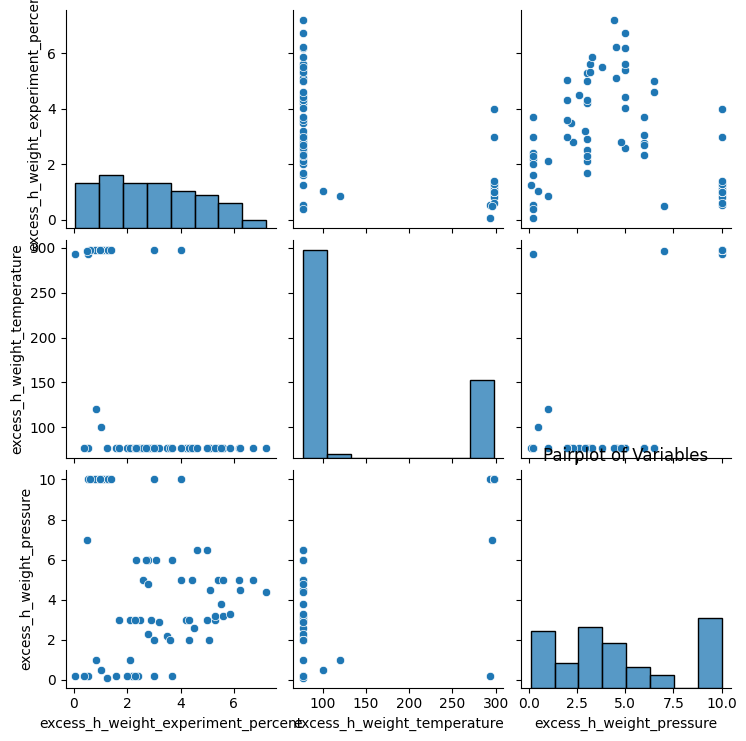

In [8]:
sns.pairplot(df)
plt.title('Pairplot of Variables')
plt.show()

C:\Users\Sajjad\AppData\Local\Temp\ipykernel_14532\1646560559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


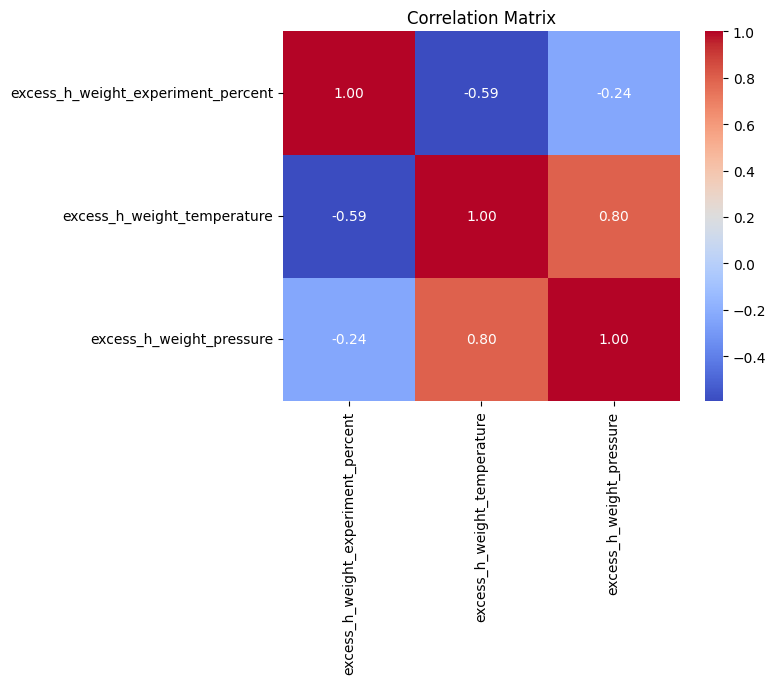

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
print("\nStep 4: Correlation Analysis")
print(correlation_matrix)


Step 4: Correlation Analysis
                                    excess_h_weight_experiment_percent  \
excess_h_weight_experiment_percent                            1.000000   
excess_h_weight_temperature                                  -0.593446   
excess_h_weight_pressure                                     -0.235465   

                                    excess_h_weight_temperature  \
excess_h_weight_experiment_percent                    -0.593446   
excess_h_weight_temperature                            1.000000   
excess_h_weight_pressure                               0.796565   

                                    excess_h_weight_pressure  
excess_h_weight_experiment_percent                 -0.235465  
excess_h_weight_temperature                         0.796565  
excess_h_weight_pressure                            1.000000  


In [11]:
print("\nStep 6: Prediction Model - Linear Regression")


Step 6: Prediction Model - Linear Regression


In [12]:
X = df[['excess_h_weight_temperature', 'excess_h_weight_pressure']]
y = df['excess_h_weight_experiment_percent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("\nStep 7: Model Evaluation")


Step 7: Model Evaluation


In [16]:
y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 1.8413819815422796
R^2 Score: 0.3315585940497656


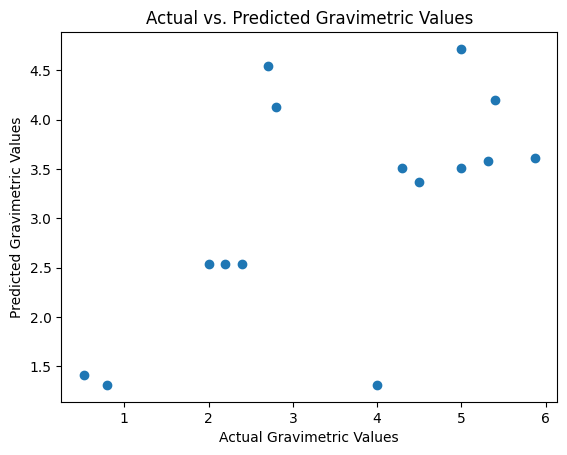

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gravimetric Values")
plt.ylabel("Predicted Gravimetric Values")
plt.title("Actual vs. Predicted Gravimetric Values")
plt.show()

In [19]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.0799250303182575
Coefficients: [-0.02090867  0.34595257]


In [20]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [21]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print('Mean Squared Error (Multiple Linear Regression):', mse_lr)
print('R^2 Score (Multiple Linear Regression):', r2_lr)

Mean Squared Error (Multiple Linear Regression): 1.8413819815422796
R^2 Score (Multiple Linear Regression): 0.3315585940497656


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

In [23]:
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print('Mean Squared Error (Polynomial Regression):', mse_poly)
print('R^2 Score (Polynomial Regression):', r2_poly)

Mean Squared Error (Polynomial Regression): 1.5762549063781528
R^2 Score (Polynomial Regression): 0.42780256550958584


In [24]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [25]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Mean Squared Error (Random Forest):', mse_rf)
print('R^2 Score (Random Forest):', r2_rf)

Mean Squared Error (Random Forest): 1.6197638562844892
R^2 Score (Random Forest): 0.4120083501114039


In [26]:
model_svm = SVR(kernel='linear')  # You can choose different kernels like 'rbf'
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [27]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print('Mean Squared Error (SVM):', mse_svm)
print('R^2 Score (SVM):', r2_svm)

Mean Squared Error (SVM): 2.0962982969143984
R^2 Score (SVM): 0.2390212378928025


In [28]:
model_svm = SVR(kernel='linear')  # You can choose different kernels like 'rbf'
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

In [29]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print('Mean Squared Error (SVM):', mse_svm)
print('R^2 Score (SVM):', r2_svm)

Mean Squared Error (SVM): 2.0962982969143984
R^2 Score (SVM): 0.2390212378928025


In [30]:
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [31]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print('Mean Squared Error (KNN):', mse_knn)
print('R^2 Score (KNN):', r2_knn)

Mean Squared Error (KNN): 1.8736053333333333
R^2 Score (KNN): 0.319861171792163


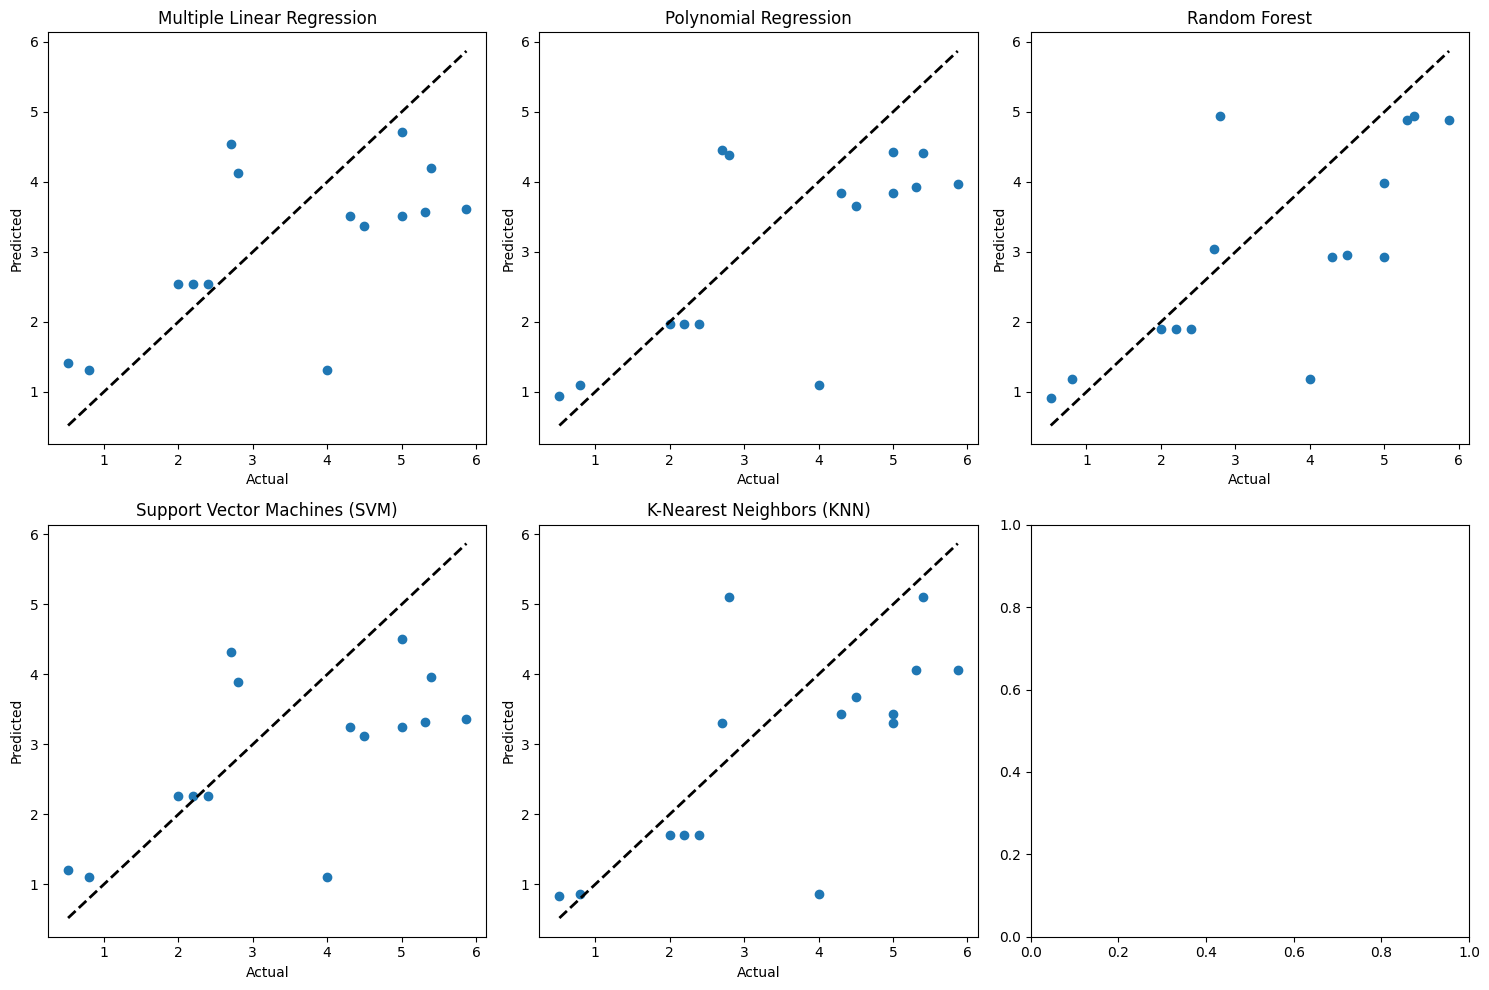

In [32]:
import matplotlib.pyplot as plt

# Create subplots for better visualization
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Multiple Linear Regression
axs[0, 0].scatter(y_test, y_pred_lr)
axs[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 0].set_xlabel('Actual')
axs[0, 0].set_ylabel('Predicted')

# Polynomial Regression
axs[0, 1].scatter(y_test_poly, y_pred_poly)
axs[0, 1].plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2)
axs[0, 1].set_title('Polynomial Regression')
axs[0, 1].set_xlabel('Actual')
axs[0, 1].set_ylabel('Predicted')

# Decision Trees (Random Forest)
axs[0, 2].scatter(y_test, y_pred_rf)
axs[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0, 2].set_title('Random Forest')
axs[0, 2].set_xlabel('Actual')
axs[0, 2].set_ylabel('Predicted')

# Support Vector Machines (SVM)
axs[1, 0].scatter(y_test, y_pred_svm)
axs[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1, 0].set_title('Support Vector Machines (SVM)')
axs[1, 0].set_xlabel('Actual')
axs[1, 0].set_ylabel('Predicted')

# K-Nearest Neighbors (KNN)
axs[1, 1].scatter(y_test, y_pred_knn)
axs[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[1, 1].set_title('K-Nearest Neighbors (KNN)')
axs[1, 1].set_xlabel('Actual')
axs[1, 1].set_ylabel('Predicted')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [35]:
from scipy.stats import f_oneway

# Group the data by pressure levels
pressure_groups = [group['excess_h_weight_experiment_percent'] for _, group in df.groupby('excess_h_weight_pressure')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*pressure_groups)

print("ANOVA for Pressure:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

ANOVA for Pressure:
F-Statistic: 8.071373349108015
P-Value: 1.144738256132806e-09


In [37]:
temperature_groups = [group['excess_h_weight_experiment_percent'] for _, group in df.groupby('excess_h_weight_temperature')]

# Perform ANOVA
f_statistic, p_value = f_oneway(*temperature_groups)

print("\nANOVA for Temperature:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)



ANOVA for Temperature:
F-Statistic: 8.996028339311342
P-Value: 1.55255072957641e-06


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print('Mean Squared Error (Best Model):', mse_best)
print('R^2 Score (Best Model):', r2_best)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (Best Model): 1.6775896175284954
R^2 Score (Best Model): 0.3910169786667287
